In [129]:
from joblib import load
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

real_cyc = pd.read_csv(r'D:\thesis\data\real.csv', index_col='starttime')
observe_cyc = pd.read_csv(r'D:\thesis\data\observed.csv', index_col='starttime')
array_real_cyc = np.array(real_cyc)
array_observe_cyc = np.array(observe_cyc)

train_real_cyc = array_real_cyc[:-24, :]
test_real_cyc = array_real_cyc[-24:, :]
train_observe_cyc = array_observe_cyc[:-24, :]
test_observe_cyc = array_observe_cyc[-24:, :]

CT = load(r'D:\thesis\models\CT.joblib')
CT2 = load(r'D:\thesis\models\CT2.joblib')
MF = load(r'D:\thesis\models\MF.joblib')
MF2 = load(r'D:\thesis\models\MF2.joblib')
MF_VAR = load(r'D:\thesis\models\MFvar.joblib')
MF_VAR2 = load(r'D:\thesis\models\MFvar2.joblib')
PMF = load(r'D:\thesis\models\PMF.joblib')
PMF2 = load(r'D:\thesis\models\PMF2.joblib')
PMF_VAR = load(r'D:\thesis\models\PMF_VAR.joblib')
PMF_VAR2 = load(r'D:\thesis\models\PMF_VAR2.joblib')

In [130]:
# Contingency Table,
# y = exp mu, mu = global_bias + geo_bias + temp_bias
CT_global_bias = CT2.global_bias
CT_geo_bias = CT2.geo_bias
CT_temp_bias = CT2.temp_bias

# MF 
# y = mu, mu = global_bias + geo_bias + temp_bias + temp_vecs * geo_vecs
MF_global_bias = MF2.global_bias
MF_geo_bias = MF2.item_bias
MF_temp_bias = MF2.user_bias
MF_geo_vecs = MF2.item_vecs
MF_temp_vecs = MF2.user_vecs

# MF_VAR, y = (mu)
MF_VAR_global_bias = MF_VAR2.global_bias
MF_VAR_geo_bias = MF_VAR2.geo_bias
MF_VAR_temp_bias = MF_VAR2.temp_bias
MF_VAR_geo_vecs = MF_VAR2.geo_vecs
MF_VAR_temp_vecs = MF_VAR2.temp_vecs
MF_A1 = MF_VAR2.A1
MF_A2 = MF_VAR2.A2

# PMF
# y = poi(mu), mu = global_bias + geo_bias + temp_bias + temp_vecs * geo_vecs
PMF_global_bias = PMF2.global_bias
PMF_geo_bias = PMF2.geo_bias
PMF_temp_bias = PMF2.temp_bias
PMF_geo_vecs = PMF2.geo_vecs
PMF_temp_vecs = PMF2.temp_vecs

# PMF_VAR, y = poi(mu)
PMF_VAR_global_bias = PMF_VAR2.global_bias
PMF_VAR_geo_bias = PMF_VAR2.geo_bias
PMF_VAR_temp_bias = PMF_VAR2.temp_bias
PMF_VAR_geo_vecs = PMF_VAR2.geo_vecs
PMF_VAR_temp_vecs = PMF_VAR2.temp_vecs
PMF_A1 = PMF_VAR2.A1
PMF_A2 = PMF_VAR2.A2

Text(0, 0.5, 'time')

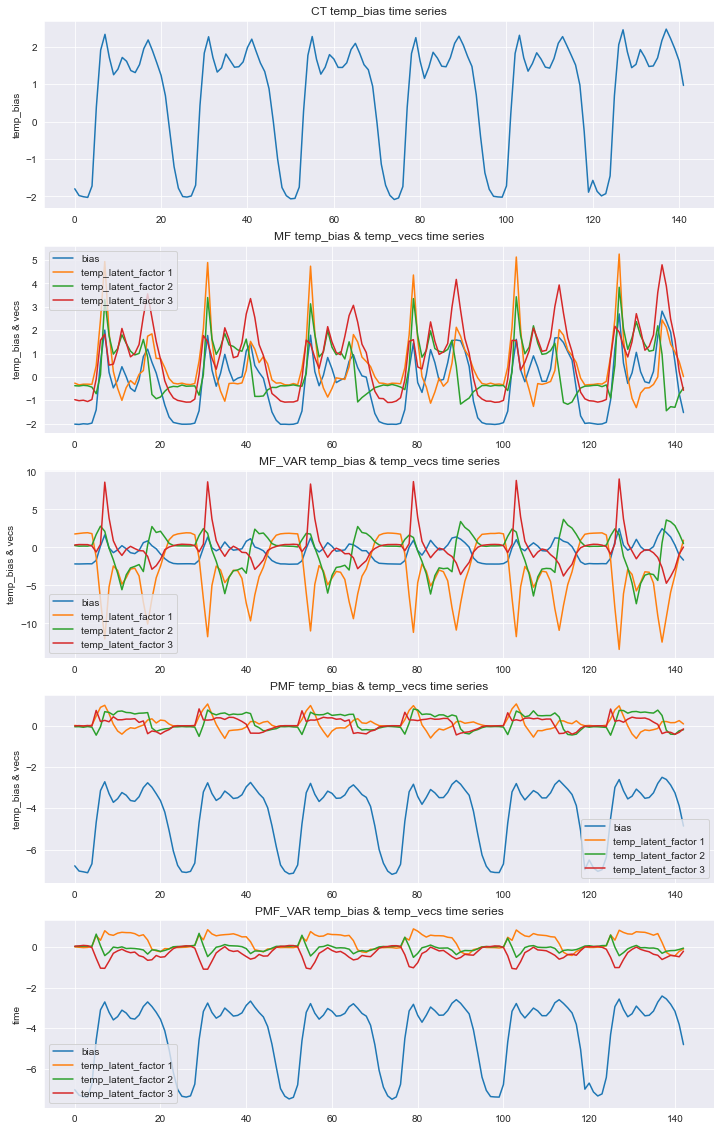

In [131]:
plt.figure(figsize=(12,20))
plt.subplot(511)
plt.title('CT temp_bias time series')
plt.plot(CT_temp_bias)
plt.ylabel('temp_bias')

plt.subplot(512)
plt.title('MF temp_bias & temp_vecs time series')
plt.plot(MF_temp_bias, label='bias')
plt.plot(MF_temp_vecs[:,0], label='temp_latent_factor 1')
plt.plot(MF_temp_vecs[:,1], label='temp_latent_factor 2')
plt.plot(MF_temp_vecs[:,2], label='temp_latent_factor 3')
plt.legend()
plt.ylabel('temp_bias & vecs')

plt.subplot(513)
plt.title('MF_VAR temp_bias & temp_vecs time series')
plt.plot(MF_VAR_temp_bias, label='bias')
plt.plot(MF_VAR_temp_vecs[:,0], label='temp_latent_factor 1')
plt.plot(MF_VAR_temp_vecs[:,1], label='temp_latent_factor 2')
plt.plot(MF_VAR_temp_vecs[:,2], label='temp_latent_factor 3')
plt.legend()
plt.ylabel('temp_bias & vecs')

plt.subplot(514)
plt.title('PMF temp_bias & temp_vecs time series')
plt.plot(PMF_temp_bias, label='bias')
plt.plot(PMF_temp_vecs[:,0], label='temp_latent_factor 1')
plt.plot(PMF_temp_vecs[:,1], label='temp_latent_factor 2')
plt.plot(PMF_temp_vecs[:,2], label='temp_latent_factor 3')
plt.legend()
plt.ylabel('temp_bias & vecs')

plt.subplot(515)
plt.title('PMF_VAR temp_bias & temp_vecs time series')
plt.plot(PMF_VAR_temp_bias, label='bias')
plt.plot(PMF_VAR_temp_vecs[:,0], label='temp_latent_factor 1')
plt.plot(PMF_VAR_temp_vecs[:,1], label='temp_latent_factor 2')
plt.plot(PMF_VAR_temp_vecs[:,2], label='temp_latent_factor 3')
plt.legend()
plt.ylabel('temp_bias & vecs')
plt.ylabel('time')

Text(0, 0.5, 'time')

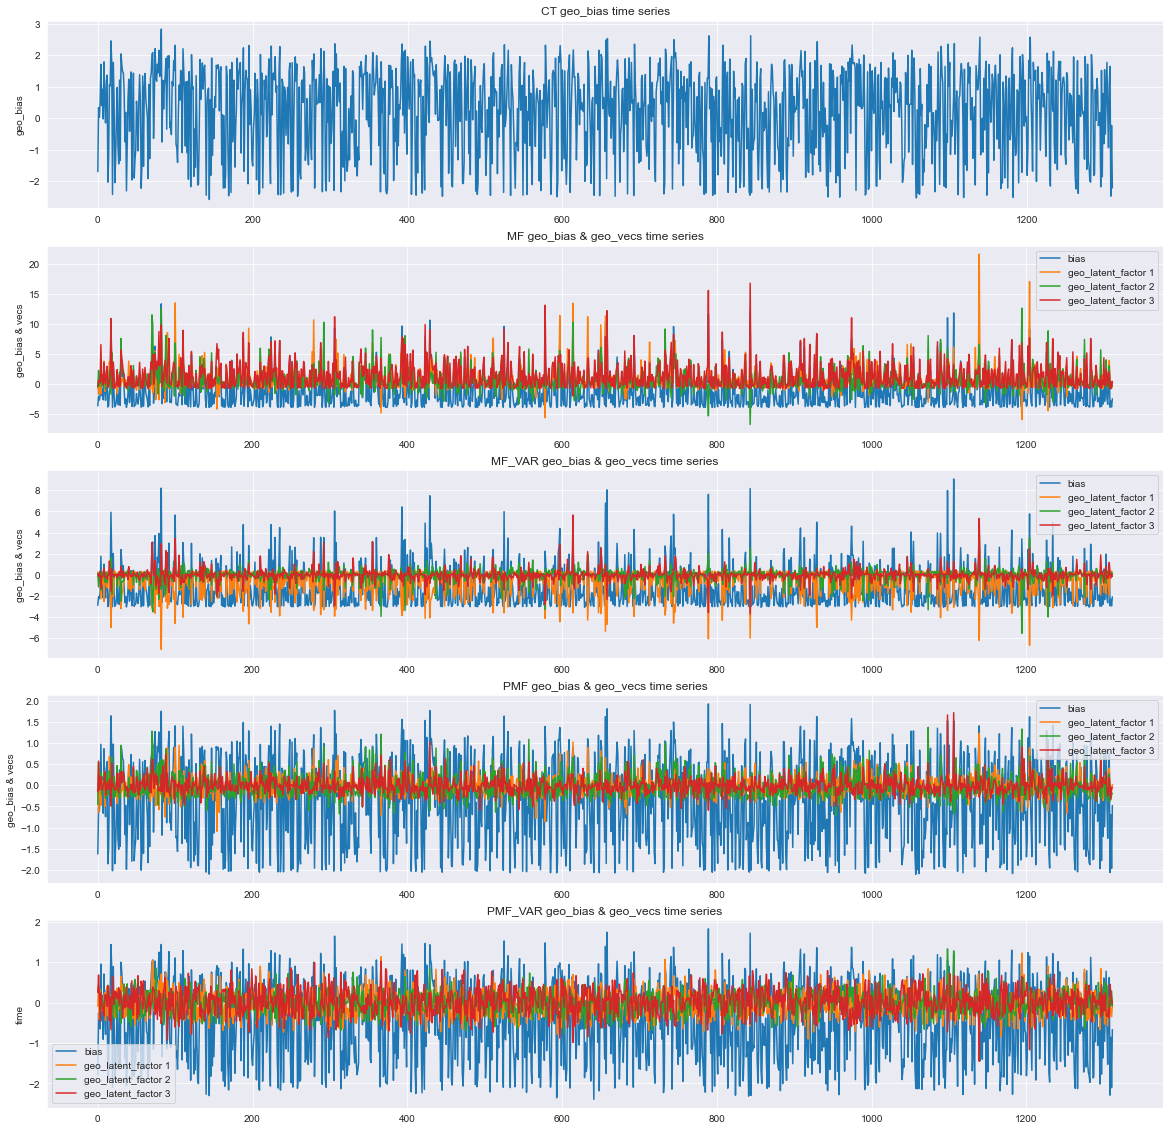

In [132]:
plt.figure(figsize=(20,20))
plt.subplot(511)
plt.title('CT geo_bias time series')
plt.plot(CT_geo_bias)
plt.ylabel('geo_bias')

plt.subplot(512)
plt.title('MF geo_bias & geo_vecs time series')
plt.plot(MF_geo_bias, label='bias')
plt.plot(MF_geo_vecs[:,0], label='geo_latent_factor 1')
plt.plot(MF_geo_vecs[:,1], label='geo_latent_factor 2')
plt.plot(MF_geo_vecs[:,2], label='geo_latent_factor 3')
plt.legend()
plt.ylabel('geo_bias & vecs')

plt.subplot(513)
plt.title('MF_VAR geo_bias & geo_vecs time series')
plt.plot(MF_VAR_geo_bias, label='bias')
plt.plot(MF_VAR_geo_vecs[:,0], label='geo_latent_factor 1')
plt.plot(MF_VAR_geo_vecs[:,1], label='geo_latent_factor 2')
plt.plot(MF_VAR_geo_vecs[:,2], label='geo_latent_factor 3')
plt.legend()
plt.ylabel('geo_bias & vecs')

plt.subplot(514)
plt.title('PMF geo_bias & geo_vecs time series')
plt.plot(PMF_geo_bias, label='bias')
plt.plot(PMF_geo_vecs[:,0], label='geo_latent_factor 1')
plt.plot(PMF_geo_vecs[:,1], label='geo_latent_factor 2')
plt.plot(PMF_geo_vecs[:,2], label='geo_latent_factor 3')
plt.legend()
plt.ylabel('geo_bias & vecs')

plt.subplot(515)
plt.title('PMF_VAR geo_bias & geo_vecs time series')
plt.plot(PMF_VAR_geo_bias, label='bias')
plt.plot(PMF_VAR_geo_vecs[:,0], label='geo_latent_factor 1')
plt.plot(PMF_VAR_geo_vecs[:,1], label='geo_latent_factor 2')
plt.plot(PMF_VAR_geo_vecs[:,2], label='geo_latent_factor 3')
plt.legend()
plt.ylabel('geo_bias & vecs')
plt.ylabel('time')

In [11]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

In [12]:
sel = ar_select_order(CT_temp_bias, maxlag=30)
sel.ar_lags
res = sel.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  142
Model:                    AutoReg(25)   Log Likelihood                 102.699
Method:               Conditional MLE   S.D. of innovations              0.101
Date:                Mon, 01 Jun 2020   AIC                             -4.132
Time:                        23:16:30   BIC                             -3.494
Sample:                            25   HQIC                            -3.873
                                  142                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0506      0.193     -0.262      0.793      -0.429       0.328
y.L1           0.4995      0.085      5.865      0.000       0.333       0.666
y.L2          -0.0380      0.054     -0.701      0.483      -0.144       0.068
y.L3          -0.0027      0.054     -0.049      0.961      -0.109       0.104
y.L4           0.0301      0.055      0.553      0.580      -0.077       0.137
y.L5           0.0315      0.055      0.572      0.567      -0.076       0.139
y.L6          -0.0730      0.055     -1.335      0.182      -0.180       0.034
y.L7           0.0477      0.055      0.870      0.384      -0.060       0.155
y.L8           0.0421      0.056      0.757      0.449      -0.067       0.151
y.L9          -0.0561      0.055     -1.013      0.311      -0.165       0.052
y.L10         -0.0211      0.055     -0.385      0.700      -0.129       0.086
y.L11          0.0944      0.056      1.698      0.090      -0.015       0.203
y.L12         -0.0457      0.056     -0.812      0.417      -0.156       0.065
y.L13         -0.0122      0.055     -0.222      0.825      -0.120       0.096
y.L14          0.0370      0.055      0.671      0.502      -0.071       0.145
y.L15          0.0406      0.056      0.725      0.468      -0.069       0.150
y.L16         -0.0771      0.056     -1.382      0.167      -0.186       0.032
y.L17          0.0179      0.056      0.317      0.751      -0.093       0.129
y.L18         -0.0131      0.057     -0.230      0.818      -0.124       0.098
y.L19          0.1119      0.058      1.937      0.053      -0.001       0.225
y.L20         -0.1277      0.058     -2.197      0.028      -0.242      -0.014
y.L21          0.0604      0.056      1.088      0.277      -0.048       0.169
y.L22          0.0669      0.060      1.119      0.263      -0.050       0.184
y.L23         -0.0735      0.063     -1.170      0.242      -0.197       0.050
y.L24          0.9996      0.062     16.002      0.000       0.877       1.122
y.L25         -0.4400      0.096     -4.577      0.000      -0.628      -0.252
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0156           -0.0000j            1.0156           -0.5000
AR.2            -0.9652           -0.2532j            0.9979           -0.4592
AR.3            -0.9652           +0.2532j            0.9979            0.4592
AR.4            -0.8596           -0.4976j            0.9932           -0.4165
AR.5            -0.8596           +0.4976j            0.9932            0.4165
AR.6            -0.6971           -0.7070j            0.9929           -0.3739
AR.7            -0.6971           +0.7070j            0.9929            0.3739
AR.8            -0.4996           -0.8743j            1.0070           -0.3326
AR

In [16]:
CT_tsa = AutoReg(CT_temp_bias, lags = [1, 24, 25])
CT_res = CT_tsa.fit()

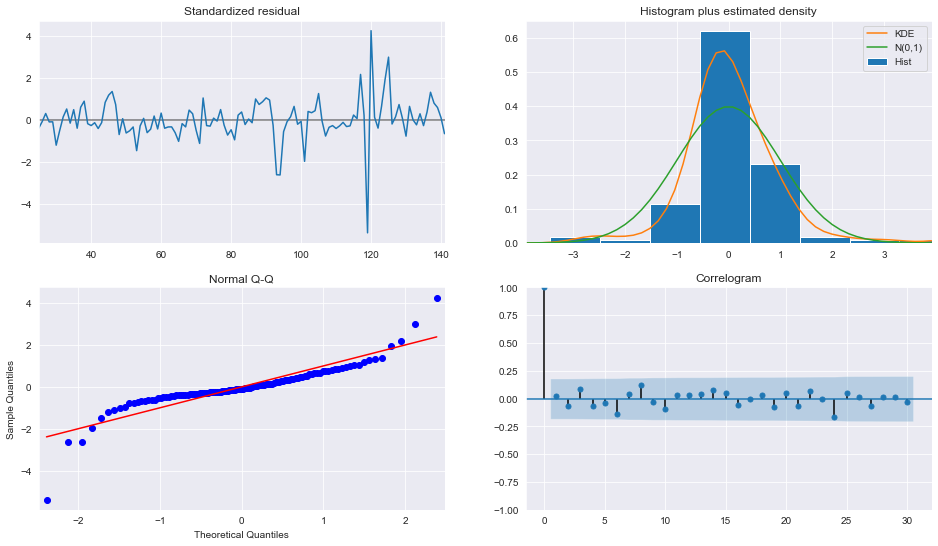

In [14]:
fig = plt.figure(figsize=(16,9))
fig = CT_res.plot_diagnostics(fig=fig, lags=30)

In [15]:
CT_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  142
Model:             Restr. AutoReg(25)   Log Likelihood                  93.522
Method:               Conditional MLE   S.D. of innovations              0.109
Date:                Mon, 01 Jun 2020   AIC                             -4.351
Time:                        23:19:56   BIC                             -4.233
Sample:                            25   HQIC                            -4.303
                                  142                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0154      0.011      1.361      0.174      -0.007       0.038
y.L1           0.4514      0.083      5.446      0.000       0.289       0.614
y.L24          1.0123      0.016     64.201      0.000       0.981       1.043
y.L25         -0.4614      0.083     -5.530      0.000      -0.625      -0.298
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.9994           -0.0000j            0.9994           -0.5000
AR.2            -0.9653           -0.2586j            0.9994           -0.4583
AR.3            -0.9653           +0.2586j            0.9994            0.4583
AR.4            -0.8655           -0.4996j            0.9994           -0.4167
AR.5            -0.8655           +0.4996j            0.9994            0.4167
AR.6            -0.7067           -0.7066j            0.9994           -0.3750
AR.7            -0.7067           +0.7066j            0.9994            0.3750
AR.8            -0.4998           -0.8654j            0.9994           -0.3333
AR.9            -0.4998           +0.8654j            0.9994            0.3333
AR.10           -0.2588           -0.9653j            0.9994           -0.2917
AR.11           -0.2588           +0.9653j            0.9994            0.2917
AR.12           -0.0002           -0.9994j            0.9994           -0.2500
AR.13           -0.0002           +0.9994j            0.9994            0.2500
AR.14            0.2585           -0.9654j            0.9995           -0.2084
AR.15            0.2585           +0.9654j            0.9995            0.2084
AR.16            0.4996           -0.8657j            0.9995           -0.1667
AR.17            0.4996           +0.8657j            0.9995            0.1667
AR.18            0.7066           -0.7070j            0.9996           -0.1250
AR.19            0.7066           +0.7070j            0.9996            0.1250
AR.20            0.8656           -0.5000j            0.9997           -0.0834
AR.21            0.8656           +0.5000j            0.9997            0.0834
AR.22            0.9998           -0.0000j            0.9998           -0.0000
AR.23            0.9657           -0.2589j            0.9998           -0.0417
AR.24            0.9657           +0.2589j            0.9998            0.0417
AR.25            2.1939           -0.0000j            2.1939           -0.0000
------------------------------------------------------------------------------
"""

In [28]:
CT_tsa.predict(CT_res.params, 141,166)

array([ 1.03677379, -0.26475624, -1.89422043, -1.55987147, -1.85245224,
       -1.97082895, -1.9080848 , -1.42831138,  0.74079571,  2.11104952,
        2.50427559,  1.89973409,  1.47149349,  1.563094  ,  1.96200332,
        1.76210653,  1.50444789,  1.52041502,  1.7392427 ,  2.20822149,
        2.51414117,  2.25956666,  1.97744034,  1.64855027,  0.99074479,
       -0.2510082 ])

In [27]:
len(CT_temp_bias)

142

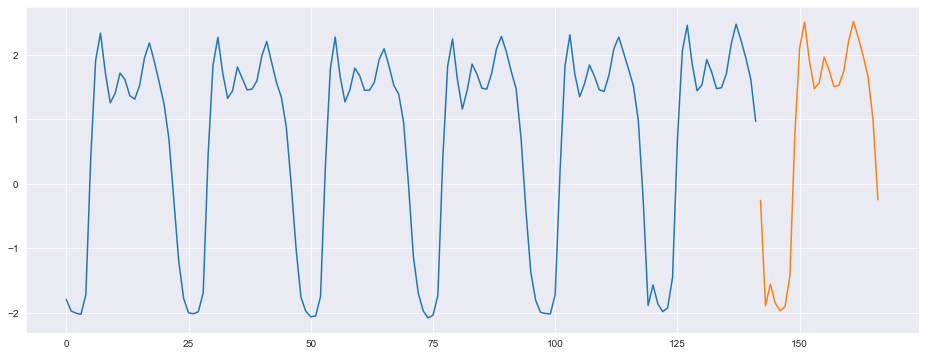

In [31]:
plt.plot(CT_temp_bias)
plt.plot(range(142,167),CT_tsa.predict(CT_res.params, 142,166) )

In [32]:
len(MF_geo_bias)

1312

In [33]:
len(MF_temp_bias)

143

In [126]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VAR

def predict(t, g, global_bias, temp_bias, geo_bias, temp_vecs, geo_vecs, method):
    """ Single temporal and spacial prediction."""

    # log(mu) = mu0 + t_i + g_j
    # mu = exp( mu0 + t_i + g_j )

    # 设置预测值的范围，防止exp爆炸造成梯度爆炸。
    # exp（10）=22k，接近一个时段所有地点的汇总，
    # exp(9)=8100, 学习率为0.001时，可以最大调整8倍，
    # exp(8)=2980，学习率为0.001时，最大可以调整3倍，
    # 而一个时间一个地点，最大值为169
    
    # 
    # E(y) = mu, log(mu) = global_bias + geo_bias + temp_bias + temp_vecs * geo_vecs
    prediction = global_bias + temp_bias[t] + geo_bias[g]
    prediction += np.dot(temp_vecs[t, :], geo_vecs[g, :])

    if method == 'MF':
        return prediction
    elif method == 'PMF':
        return np.exp(prediction)
    else:
        raise ValueError('Only support MF, PMF method')

def predict_all(global_bias, temp_bias, geo_bias, temp_vecs, geo_vecs, method='MF'):
    """ Predict count for every user and item."""
    predictions = np.zeros((24, 1312))
    for t in range(24):
        for g in range(1312):
            predictions[t, g] = predict(t, g, global_bias, temp_bias, geo_bias, temp_vecs, geo_vecs, method)

    return predictions

def forecast_pearson_residuals(pred_matrix, actual_matrix, title_add=''):
    pred = pred_matrix[~np.isnan(actual_matrix)].flatten()
    actual = actual_matrix[~np.isnan(actual_matrix)].flatten()
    
    mse = mean_squared_error(pred, actual)
    plt.figure(figsize=[10, 6])
    plt.title('Forecast Pearson Residuals\n' + title_add +'\nMSE=%.3f'%mse)
    plt.scatter(actual, (actual - pred)/np.sqrt(pred+0.1), label='pearson residuals')
    plt.hlines(y=0, xmax=max(actual), xmin=0, linestyles='dashed')
    plt.xlabel('y')
    plt.ylabel('delta')
    plt.ylim((-10,20))
    plt.legend()

    plt.savefig(r'D:\thesis\figures\forecast\%s.png' % title_add)
    plt.show()

## MF model temporal bias & vecs forecast

Text(0.5, 0, 'time')

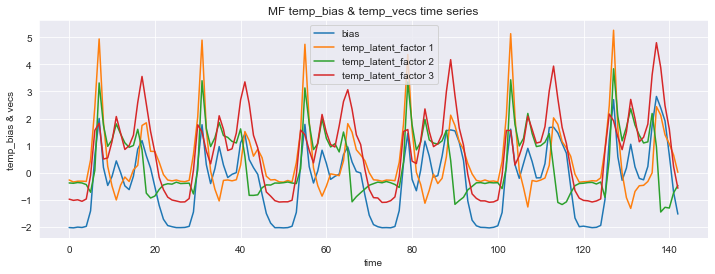

In [51]:
plt.figure(figsize=(12,4))
plt.title('MF temp_bias & temp_vecs time series')
plt.plot(MF_temp_bias, label='bias')
plt.plot(MF_temp_vecs[:,0], label='temp_latent_factor 1')
plt.plot(MF_temp_vecs[:,1], label='temp_latent_factor 2')
plt.plot(MF_temp_vecs[:,2], label='temp_latent_factor 3')
plt.legend()
plt.ylabel('temp_bias & vecs')
plt.xlabel('time')

### temp bias

In [35]:
sel = ar_select_order(MF_temp_bias, maxlag=30)
sel.ar_lags
res = sel.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:                    AutoReg(26)   Log Likelihood                  11.913
Method:               Conditional MLE   S.D. of innovations              0.219
Date:                Tue, 02 Jun 2020   AIC                             -2.563
Time:                        09:35:52   BIC                             -1.902
Sample:                            26   HQIC                            -2.295
                                  143                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0631      0.060      1.058      0.290      -0.054       0.180
y.L1           0.8853      0.091      9.749      0.000       0.707       1.063
y.L2          -0.3884      0.105     -3.712      0.000      -0.593      -0.183
y.L3           0.0573      0.075      0.766      0.444      -0.089       0.204
y.L4           0.0752      0.077      0.983      0.326      -0.075       0.225
y.L5          -0.1164      0.078     -1.498      0.134      -0.269       0.036
y.L6           0.1059      0.080      1.326      0.185      -0.051       0.262
y.L7          -0.0534      0.079     -0.673      0.501      -0.209       0.102
y.L8          -0.0214      0.078     -0.273      0.785      -0.175       0.132
y.L9           0.0108      0.077      0.140      0.889      -0.141       0.162
y.L10          0.0297      0.077      0.385      0.700      -0.122       0.181
y.L11         -0.0187      0.078     -0.241      0.809      -0.171       0.133
y.L12          0.0567      0.079      0.718      0.473      -0.098       0.211
y.L13         -0.0208      0.080     -0.262      0.793      -0.177       0.135
y.L14         -0.0101      0.081     -0.124      0.902      -0.170       0.150
y.L15          0.0008      0.084      0.009      0.993      -0.163       0.165
y.L16         -0.0303      0.088     -0.342      0.732      -0.204       0.143
y.L17          0.0357      0.088      0.406      0.685      -0.136       0.208
y.L18         -0.0524      0.085     -0.618      0.537      -0.219       0.114
y.L19          0.0533      0.081      0.659      0.510      -0.105       0.212
y.L20         -0.0155      0.081     -0.192      0.848      -0.173       0.142
y.L21         -0.0231      0.081     -0.287      0.774      -0.181       0.135
y.L22          0.0648      0.082      0.795      0.427      -0.095       0.225
y.L23         -0.0156      0.082     -0.190      0.849      -0.176       0.145
y.L24          0.9269      0.081     11.402      0.000       0.768       1.086
y.L25         -0.7423      0.112     -6.657      0.000      -0.961      -0.524
y.L26          0.2565      0.099      2.595      0.009       0.063       0.450
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0011           -0.0000j            1.0011           -0.5000
AR.2            -0.9729           -0.2533j            1.0053           -0.4595
AR.3            -0.9729           +0.2533j            1.0053            0.4595
AR.4            -0.8698           -0.5059j            1.0062           -0.4162
AR.5            -0.8698           +0.5059j            1.0062            0.4162
AR.6            -0.7113           -0.7245j            1.0154           -0.3735
AR.7            -0.7113           +0.7245j            1.0154            0.3735
AR

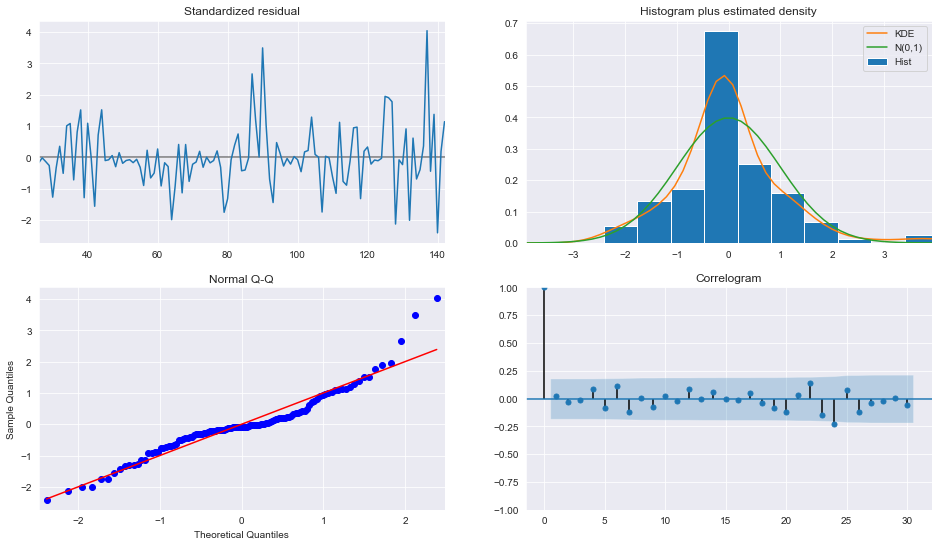

In [36]:
MF_tsa = AutoReg(MF_temp_bias, lags = [1, 2, 24, 25, 26])
MF_res = MF_tsa.fit()
fig = plt.figure(figsize=(16,9))
fig = MF_res.plot_diagnostics(fig=fig, lags=30)

In [37]:
new_MF_temp_bias=MF_tsa.predict(MF_res.params, 143,166)
len(new_MF_temp_bias)

24

### temp_vecs

In [62]:
MF_temp_vecs_diff = pd.DataFrame(MF_temp_vecs).diff(24).values[24:,]
MF_model = VAR(MF_temp_vecs_diff)
MF_model.select_order(10).summary()

,AIC,BIC,FPE,HQIC
0,-8.867,-8.793,0.0001410,-8.837
1,-9.572*,-9.276*,6.966e-05*,-9.452*
2,-9.564,-9.045,7.028e-05,-9.353
3,-9.470,-8.729,7.724e-05,-9.170
4,-9.424,-8.461,8.106e-05,-9.033
5,-9.360,-8.174,8.669e-05,-8.879
6,-9.283,-7.876,9.400e-05,-8.712
7,-9.222,-7.592,0.0001006,-8.561
8,-9.163,-7.312,0.0001075,-8.412
9,-9.064,-6.990,0.0001199,-8.223


In [149]:
results = MF_model.fit(maxlags=10, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Jun, 2020
Time:                     22:46:28
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -9.36505
Nobs:                     118.000    HQIC:                  -9.53241
Log likelihood:           78.8578    FPE:                6.46361e-05
AIC:                     -9.64681    Det(Omega_mle):     5.84846e-05
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.001196         0.019830           -0.060           0.952
L1.y1         0.341526         0.088435            3.862           0.000
L1.y2        -0.178799         0.102152           -1.750           0.080
L1.y3         0.077746

167

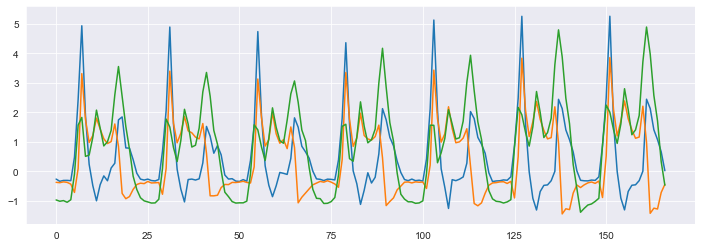

In [150]:
lag_order = results.k_ar
new_MF_temp_vecs_diff = results.forecast(MF_temp_vecs[-lag_order:], 24)
new_MF_temp_vecs = new_MF_temp_vecs_diff + MF_temp_vecs[-24: , ]

plt.figure(figsize=(12,4))
plt.plot(np.append(MF_temp_vecs,new_MF_temp_vecs, axis=0))
len(np.append(MF_temp_vecs,new_MF_temp_vecs, axis=0))

### prediction

c:\users\drsongliang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in sqrt


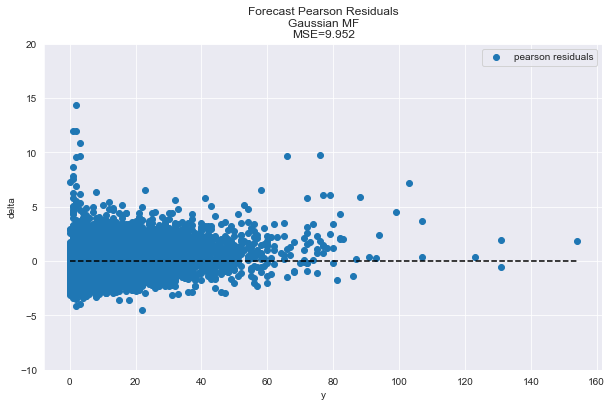

In [127]:
MF_prediction = predict_all(MF_global_bias, new_MF_temp_bias, MF_geo_bias, new_MF_temp_vecs, MF_geo_vecs, method='MF')

forecast_pearson_residuals(MF_prediction, test_real_cyc, title_add='Gaussian MF')

## MF VAR temporal forecast

Text(0.5, 0, 'time')

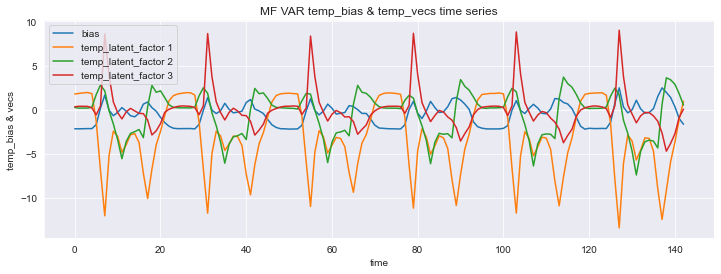

In [151]:
plt.figure(figsize=(12,4))
plt.title('MF VAR temp_bias & temp_vecs time series')
plt.plot(MF_VAR_temp_bias, label='bias')
plt.plot(MF_VAR_temp_vecs[:,0], label='temp_latent_factor 1')
plt.plot(MF_VAR_temp_vecs[:,1], label='temp_latent_factor 2')
plt.plot(MF_VAR_temp_vecs[:,2], label='temp_latent_factor 3')
plt.legend()
plt.ylabel('temp_bias & vecs')
plt.xlabel('time')

### temp bias

In [152]:
sel = ar_select_order(MF_VAR_temp_bias, maxlag=30)
sel.ar_lags
res = sel.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:                    AutoReg(25)   Log Likelihood                  -4.624
Method:               Conditional MLE   S.D. of innovations              0.252
Date:                Tue, 02 Jun 2020   AIC                             -2.302
Time:                        22:46:40   BIC                             -1.668
Sample:                            25   HQIC                            -2.044
                                  143                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0548      0.123      0.444      0.657      -0.187       0.297
y.L1           0.7258      0.081      8.939      0.000       0.567       0.885
y.L2          -0.1165      0.080     -1.454      0.146      -0.274       0.041
y.L3          -0.0112      0.080     -0.139      0.889      -0.169       0.146
y.L4           0.1232      0.080      1.540      0.124      -0.034       0.280
y.L5          -0.1286      0.081     -1.587      0.113      -0.287       0.030
y.L6           0.0683      0.083      0.823      0.411      -0.094       0.231
y.L7          -0.0058      0.083     -0.071      0.944      -0.168       0.156
y.L8          -0.0412      0.082     -0.500      0.617      -0.202       0.120
y.L9           0.0107      0.083      0.129      0.897      -0.151       0.173
y.L10          0.0272      0.082      0.331      0.741      -0.134       0.188
y.L11          0.0076      0.083      0.092      0.927      -0.154       0.169
y.L12          0.0133      0.084      0.158      0.875      -0.152       0.179
y.L13          0.0018      0.085      0.021      0.983      -0.165       0.169
y.L14         -0.0310      0.088     -0.351      0.726      -0.204       0.142
y.L15          0.0226      0.092      0.247      0.805      -0.157       0.202
y.L16         -0.0618      0.097     -0.637      0.524      -0.252       0.128
y.L17          0.0727      0.095      0.766      0.444      -0.113       0.259
y.L18         -0.0812      0.091     -0.893      0.372      -0.259       0.097
y.L19          0.0798      0.091      0.880      0.379      -0.098       0.258
y.L20         -0.0441      0.091     -0.486      0.627      -0.222       0.134
y.L21          0.0082      0.090      0.090      0.928      -0.169       0.185
y.L22         -0.0019      0.091     -0.021      0.984      -0.179       0.176
y.L23          0.0807      0.090      0.895      0.371      -0.096       0.257
y.L24          0.8447      0.088      9.618      0.000       0.673       1.017
y.L25         -0.5386      0.091     -5.930      0.000      -0.717      -0.361
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0193           -0.0000j            1.0193           -0.5000
AR.2            -0.9780           -0.2447j            1.0082           -0.4610
AR.3            -0.9780           +0.2447j            1.0082            0.4610
AR.4            -0.8759           -0.5033j            1.0102           -0.4170
AR.5            -0.8759           +0.5033j            1.0102            0.4170
AR.6            -0.7177           -0.7264j            1.0212           -0.3740
AR.7            -0.7177           +0.7264j            1.0212            0.3740
AR.8            -0.4980           -0.8821j            1.0130           -0.3318
AR

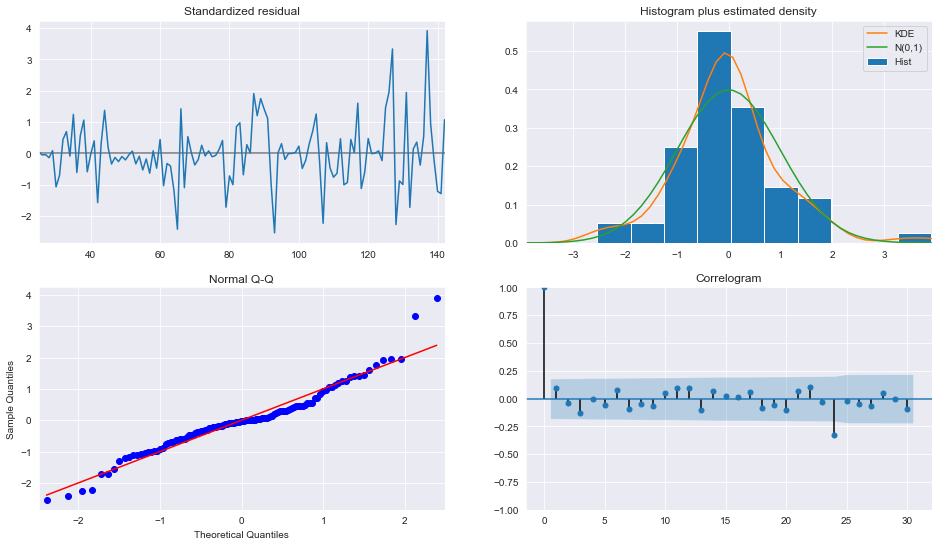

In [153]:
MF_VAR_tsa = AutoReg(MF_VAR_temp_bias, lags = [1, 24, 25])
MF_VAR_res = MF_VAR_tsa.fit()
fig = plt.figure(figsize=(16,9))
fig = MF_VAR_res.plot_diagnostics(fig=fig, lags=30)

In [154]:
new_MF_VAR_temp_bias=MF_VAR_tsa.predict(MF_VAR_res.params, 143,166)
len(new_MF_VAR_temp_bias)

24

### temp vecs

In [155]:
# 构造步长为24的差分
MF_VAR_temp_vecs_diff = pd.DataFrame(MF_VAR_temp_vecs).diff(24).values[24:,]

# 滞后阶数显著
MF_VAR_model = VAR(MF_VAR_temp_vecs_diff)
MF_VAR_model.select_order(10).summary()

,AIC,BIC,FPE,HQIC
0,-7.013,-6.939,0.0009000,-6.983
1,-10.65,-10.35,2.370e-05,-10.53
2,-12.13*,-11.61*,5.393e-06*,-11.92*
3,-12.12,-11.38,5.448e-06,-11.82
4,-12.04,-11.07,5.940e-06,-11.65
5,-11.96,-10.78,6.422e-06,-11.48
6,-11.92,-10.52,6.697e-06,-11.35
7,-11.85,-10.22,7.239e-06,-11.19
8,-11.77,-9.921,7.903e-06,-11.02
9,-11.93,-9.852,6.852e-06,-11.09


In [156]:
# 模型拟合
results = MF_VAR_model.fit(maxlags=10, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Jun, 2020
Time:                     22:46:45
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -11.7250
Nobs:                     117.000    HQIC:                  -12.0195
Log likelihood:           237.867    FPE:                4.92919e-06
AIC:                     -12.2208    Det(Omega_mle):     4.14065e-06
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.032268         0.021563           -1.496           0.135
L1.y1         1.335753         0.077806           17.168           0.000
L1.y2         0.132229         0.133078            0.994           0.320
L1.y3         0.096257

167

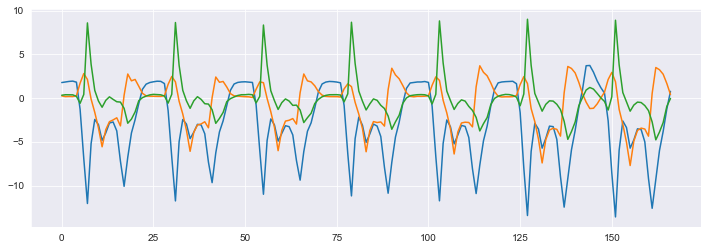

In [158]:
lag_order = results.k_ar
new_MF_VAR_temp_vecs_diff = results.forecast(MF_VAR_temp_vecs[-lag_order:], 24)
new_MF_VAR_temp_vecs = new_MF_VAR_temp_vecs_diff + MF_VAR_temp_vecs[-24: , ]

plt.figure(figsize=(12,4))
plt.plot(np.append(MF_VAR_temp_vecs,new_MF_VAR_temp_vecs, axis=0))
len(np.append(MF_VAR_temp_vecs,new_MF_VAR_temp_vecs, axis=0))

### Prediction

c:\users\drsongliang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in sqrt


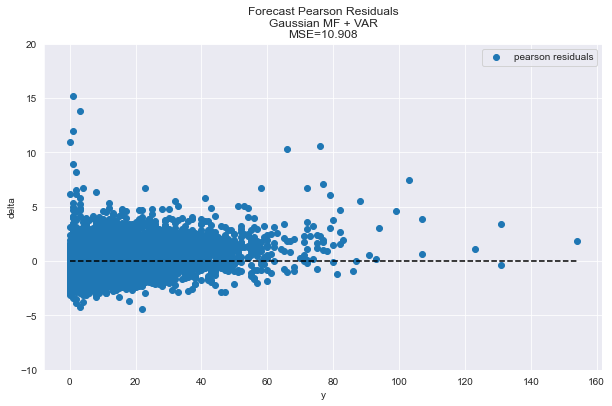

In [159]:
MF_VAR_prediction = predict_all(MF_VAR_global_bias, new_MF_VAR_temp_bias, MF_VAR_geo_bias, new_MF_VAR_temp_vecs, MF_VAR_geo_vecs, method='MF')

forecast_pearson_residuals(MF_VAR_prediction, test_real_cyc, title_add='Gaussian MF + VAR')

## PMF model temporal bias & vecs forecast

Text(0.5, 0, 'time')

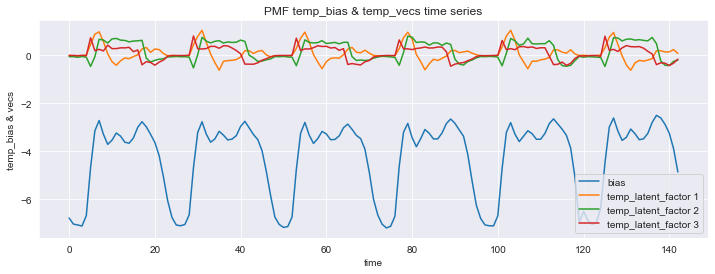

In [111]:
plt.figure(figsize=(12,4))
plt.title('PMF temp_bias & temp_vecs time series')
plt.plot(PMF_temp_bias, label='bias')
plt.plot(PMF_temp_vecs[:,0], label='temp_latent_factor 1')
plt.plot(PMF_temp_vecs[:,1], label='temp_latent_factor 2')
plt.plot(PMF_temp_vecs[:,2], label='temp_latent_factor 3')
plt.legend()
plt.ylabel('temp_bias & vecs')
plt.xlabel('time')

### temp bias

In [112]:
sel = ar_select_order(PMF_temp_bias, maxlag=30)
sel.ar_lags
res = sel.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:                    AutoReg(25)   Log Likelihood                  87.825
Method:               Conditional MLE   S.D. of innovations              0.115
Date:                Tue, 02 Jun 2020   AIC                             -3.869
Time:                        13:33:13   BIC                             -3.235
Sample:                            25   HQIC                            -3.611
                                  143                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6025      1.386      0.435      0.664      -2.113       3.318
y.L1           0.3920      0.089      4.396      0.000       0.217       0.567
y.L2          -0.0570      0.065     -0.882      0.378      -0.184       0.070
y.L3           0.0104      0.064      0.162      0.871      -0.115       0.136
y.L4           0.0569      0.064      0.888      0.374      -0.069       0.182
y.L5          -0.0269      0.066     -0.409      0.682      -0.156       0.102
y.L6          -0.0175      0.064     -0.274      0.784      -0.143       0.108
y.L7           0.0405      0.064      0.636      0.525      -0.084       0.165
y.L8           0.0217      0.064      0.340      0.734      -0.103       0.147
y.L9          -0.0395      0.064     -0.615      0.538      -0.165       0.086
y.L10         -0.0083      0.064     -0.130      0.897      -0.133       0.117
y.L11          0.0731      0.064      1.149      0.251      -0.052       0.198
y.L12         -0.0474      0.065     -0.735      0.463      -0.174       0.079
y.L13          0.0143      0.064      0.224      0.823      -0.111       0.139
y.L14          0.0285      0.064      0.445      0.656      -0.097       0.154
y.L15          0.0260      0.064      0.406      0.685      -0.099       0.151
y.L16         -0.0351      0.064     -0.548      0.584      -0.161       0.090
y.L17         -0.0147      0.064     -0.231      0.817      -0.140       0.110
y.L18         -0.0198      0.064     -0.309      0.757      -0.145       0.106
y.L19          0.1370      0.064      2.143      0.032       0.012       0.262
y.L20         -0.1315      0.065     -2.015      0.044      -0.259      -0.004
y.L21          0.0390      0.064      0.613      0.540      -0.086       0.164
y.L22          0.1202      0.064      1.891      0.059      -0.004       0.245
y.L23         -0.1287      0.074     -1.740      0.082      -0.274       0.016
y.L24          1.0346      0.080     12.868      0.000       0.877       1.192
y.L25         -0.3319      0.108     -3.063      0.002      -0.544      -0.120
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0074           -0.0000j            1.0074           -0.5000
AR.2            -0.9620           -0.2519j            0.9944           -0.4592
AR.3            -0.9620           +0.2519j            0.9944            0.4592
AR.4            -0.8606           -0.4977j            0.9942           -0.4166
AR.5            -0.8606           +0.4977j            0.9942            0.4166
AR.6            -0.6916           -0.7098j            0.9910           -0.3729
AR.7            -0.6916           +0.7098j            0.9910            0.3729
AR.8            -0.4878           -0.8796j            1.0058           -0.3306
AR

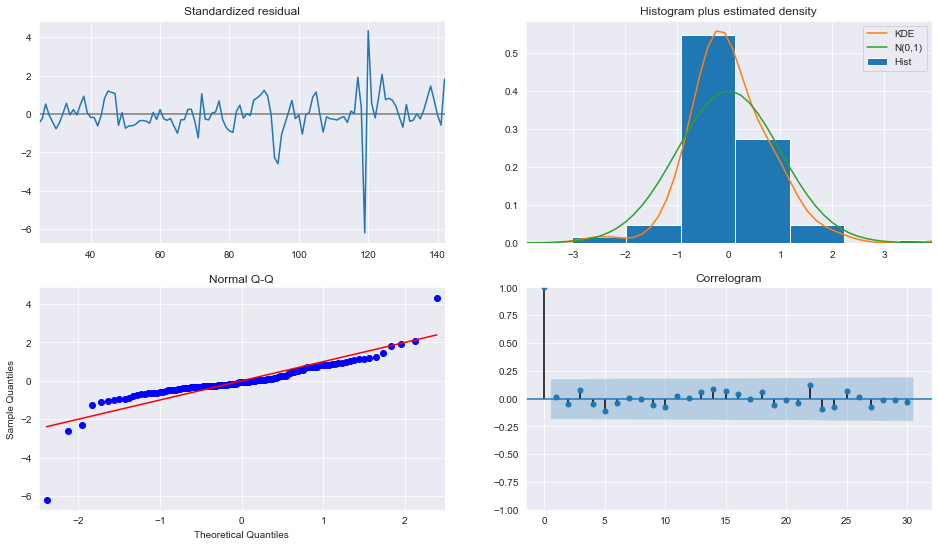

In [71]:
PMF_tsa = AutoReg(PMF_temp_bias, lags = [1, 24, 25])
PMF_res = PMF_tsa.fit()
fig = plt.figure(figsize=(16,9))
fig = PMF_res.plot_diagnostics(fig=fig, lags=30)

In [72]:
new_PMF_temp_bias=PMF_tsa.predict(PMF_res.params, 143,166)
len(new_PMF_temp_bias)

24

### temp vecs

In [113]:
PMF_temp_vecs_diff = pd.DataFrame(PMF_temp_vecs).diff(24).values[24:,]
PMF_model = VAR(PMF_temp_vecs_diff)
PMF_model.select_order(10).summary()

,AIC,BIC,FPE,HQIC
0,-16.11,-16.04,1.005e-07,-16.08
1,-16.52,-16.22*,6.705e-08,-16.40
2,-16.62*,-16.10,6.067e-08*,-16.41*
3,-16.60,-15.86,6.198e-08,-16.30
4,-16.55,-15.59,6.518e-08,-16.16
5,-16.48,-15.30,6.983e-08,-16.00
6,-16.43,-15.02,7.395e-08,-15.86
7,-16.32,-14.69,8.310e-08,-15.66
8,-16.24,-14.38,9.120e-08,-15.48
9,-16.28,-14.20,8.835e-08,-15.44


In [114]:
results = PMF_model.fit(maxlags=10, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Jun, 2020
Time:                     13:33:39
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -16.2047
Nobs:                     117.000    HQIC:                  -16.4992
Log likelihood:           499.930    FPE:                5.58808e-08
AIC:                     -16.7005    Det(Omega_mle):     4.69413e-08
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.005763         0.005104           -1.129           0.259
L1.y1         0.297734         0.087990            3.384           0.001
L1.y2         0.097570         0.075598            1.291           0.197
L1.y3        -0.079255

167

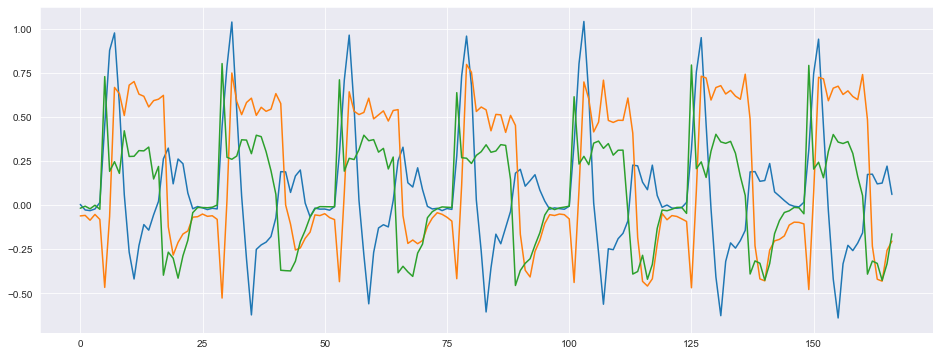

In [117]:
lag_order = results.k_ar
new_PMF_temp_vecs_diff = results.forecast(PMF_temp_vecs[-lag_order:], 24)
new_PMF_temp_vecs = new_PMF_temp_vecs_diff + PMF_temp_vecs[-24:,]
plt.plot(np.append(PMF_temp_vecs,new_PMF_temp_vecs, axis=0))
len(np.append(PMF_temp_vecs,new_PMF_temp_vecs, axis=0))

### prediction

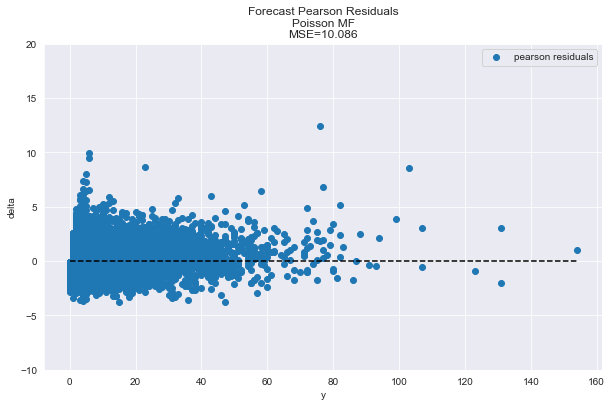

In [128]:
PMF_prediction = predict_all(PMF_global_bias, new_PMF_temp_bias, PMF_geo_bias, new_PMF_temp_vecs, PMF_geo_vecs, method='PMF')

forecast_pearson_residuals(PMF_prediction, test_real_cyc, title_add='Poisson MF')

## PMF VAR forecast

Text(0.5, 0, 'time')

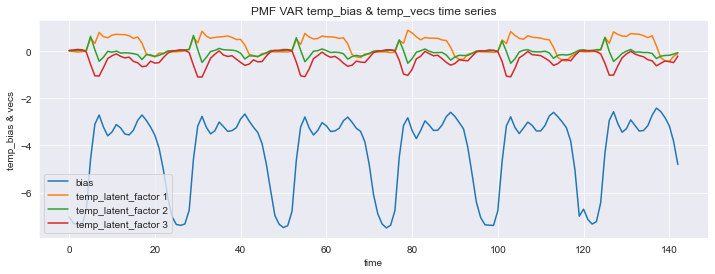

In [160]:
plt.figure(figsize=(12,4))
plt.title('PMF VAR temp_bias & temp_vecs time series')
plt.plot(PMF_VAR_temp_bias, label='bias')
plt.plot(PMF_VAR_temp_vecs[:,0], label='temp_latent_factor 1')
plt.plot(PMF_VAR_temp_vecs[:,1], label='temp_latent_factor 2')
plt.plot(PMF_VAR_temp_vecs[:,2], label='temp_latent_factor 3')
plt.legend()
plt.ylabel('temp_bias & vecs')
plt.xlabel('time')

### temp bias

In [161]:
sel = ar_select_order(PMF_VAR_temp_bias, maxlag=30)
sel.ar_lags
res = sel.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:                    AutoReg(25)   Log Likelihood                  85.951
Method:               Conditional MLE   S.D. of innovations              0.117
Date:                Tue, 02 Jun 2020   AIC                             -3.837
Time:                        22:55:15   BIC                             -3.203
Sample:                            25   HQIC                            -3.580
                                  143                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5140      1.225      0.420      0.675      -1.887       2.915
y.L1           0.4640      0.087      5.346      0.000       0.294       0.634
y.L2          -0.0363      0.065     -0.558      0.577      -0.164       0.091
y.L3           0.0071      0.065      0.111      0.912      -0.119       0.134
y.L4           0.0371      0.064      0.578      0.563      -0.089       0.163
y.L5          -0.0025      0.065     -0.038      0.969      -0.130       0.125
y.L6          -0.0361      0.064     -0.563      0.574      -0.162       0.090
y.L7           0.0423      0.064      0.660      0.509      -0.083       0.168
y.L8           0.0292      0.064      0.453      0.650      -0.097       0.155
y.L9          -0.0467      0.065     -0.720      0.471      -0.174       0.080
y.L10         -0.0056      0.064     -0.086      0.931      -0.132       0.121
y.L11          0.0757      0.064      1.181      0.237      -0.050       0.201
y.L12         -0.0620      0.066     -0.942      0.346      -0.191       0.067
y.L13          0.0288      0.065      0.444      0.657      -0.098       0.156
y.L14          0.0157      0.065      0.242      0.809      -0.111       0.142
y.L15          0.0284      0.065      0.439      0.661      -0.099       0.156
y.L16         -0.0446      0.065     -0.690      0.490      -0.171       0.082
y.L17          0.0193      0.065      0.297      0.766      -0.108       0.146
y.L18         -0.0568      0.065     -0.868      0.385      -0.185       0.071
y.L19          0.1480      0.065      2.279      0.023       0.021       0.275
y.L20         -0.1197      0.066     -1.823      0.068      -0.248       0.009
y.L21          0.0193      0.064      0.301      0.764      -0.106       0.145
y.L22          0.1167      0.064      1.823      0.068      -0.009       0.242
y.L23         -0.1162      0.072     -1.609      0.108      -0.258       0.025
y.L24          1.0368      0.080     13.018      0.000       0.881       1.193
y.L25         -0.4267      0.104     -4.086      0.000      -0.631      -0.222
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0105           -0.0000j            1.0105           -0.5000
AR.2            -0.9602           -0.2508j            0.9924           -0.4593
AR.3            -0.9602           +0.2508j            0.9924            0.4593
AR.4            -0.8575           -0.4986j            0.9919           -0.4162
AR.5            -0.8575           +0.4986j            0.9919            0.4162
AR.6            -0.6920           -0.7086j            0.9904           -0.3731
AR.7            -0.6920           +0.7086j            0.9904            0.3731
AR.8            -0.4944           -0.8807j            1.0099           -0.3314
AR

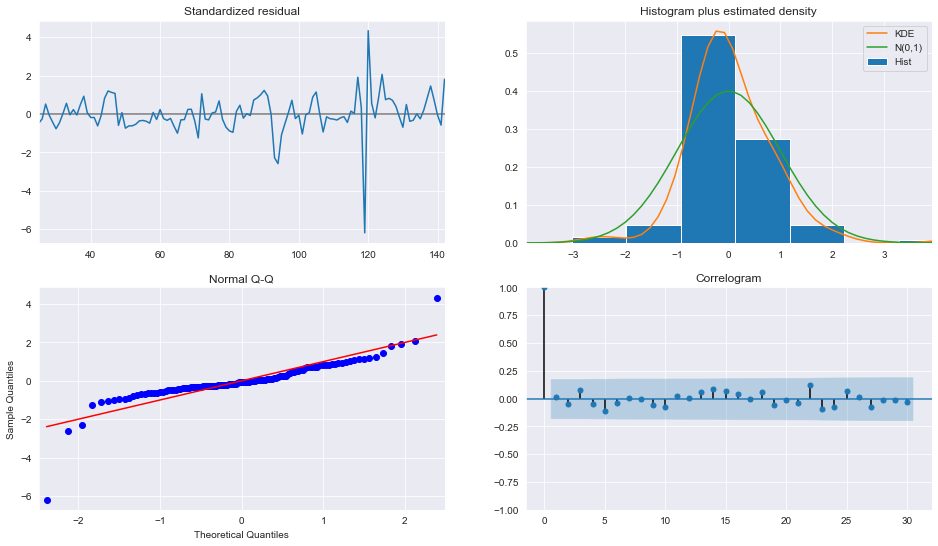

In [170]:
PMF_VAR_tsa = AutoReg(PMF_VAR_temp_bias, lags = [1, 24, 25])
PMF_VAR_res = PMF_VAR_tsa.fit()
fig = plt.figure(figsize=(16,9))
fig = PMF_res.plot_diagnostics(fig=fig, lags=30)

In [171]:
new_PMF_VAR_temp_bias=PMF_VAR_tsa.predict(PMF_VAR_res.params, 143,166)
len(new_PMF_VAR_temp_bias)

24

### temp vecs

In [165]:
PMF_VAR_temp_vecs_diff = pd.DataFrame(PMF_VAR_temp_vecs).diff(24).values[24:,]
PMF_VAR_model = VAR(PMF_VAR_temp_vecs_diff)
PMF_VAR_model.select_order(10).summary()

,AIC,BIC,FPE,HQIC
0,-17.72,-17.65,2.017e-08,-17.69
1,-19.82,-19.52*,2.469e-09,-19.70*
2,-19.85*,-19.34,2.387e-09*,-19.64
3,-19.84,-19.10,2.429e-09,-19.54
4,-19.79,-18.83,2.544e-09,-19.40
5,-19.78,-18.60,2.580e-09,-19.30
6,-19.70,-18.29,2.820e-09,-19.13
7,-19.79,-18.16,2.594e-09,-19.13
8,-19.75,-17.90,2.712e-09,-19.00
9,-19.65,-17.58,3.029e-09,-18.81


In [166]:
results = PMF_VAR_model.fit(maxlags=10, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Jun, 2020
Time:                     22:57:04
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -19.4927
Nobs:                     117.000    HQIC:                  -19.7872
Log likelihood:           692.280    FPE:                2.08587e-09
AIC:                     -19.9885    Det(Omega_mle):     1.75218e-09
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.001245         0.003413           -0.365           0.715
L1.y1         1.055247         0.088644           11.904           0.000
L1.y2        -0.159951         0.100834           -1.586           0.113
L1.y3        -0.067491

167

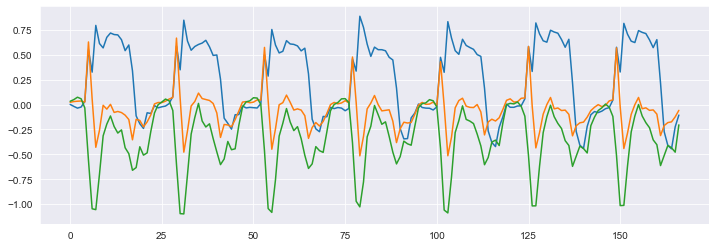

In [168]:
lag_order = results.k_ar
new_PMF_VAR_temp_vecs_diff = results.forecast(PMF_VAR_temp_vecs[-lag_order:], 24)
new_PMF_VAR_temp_vecs = new_PMF_VAR_temp_vecs_diff + PMF_VAR_temp_vecs[-24:,]

plt.figure(figsize=(12,4))
plt.plot(np.append(PMF_VAR_temp_vecs,new_PMF_VAR_temp_vecs, axis=0))
len(np.append(PMF_VAR_temp_vecs,new_PMF_VAR_temp_vecs, axis=0))

### Prediction

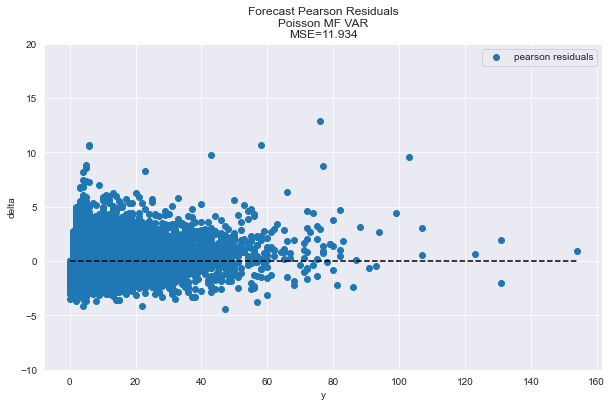

In [172]:
PMF_VAR_prediction = predict_all(PMF_VAR_global_bias, new_PMF_VAR_temp_bias, PMF_VAR_geo_bias, new_PMF_VAR_temp_vecs, PMF_VAR_geo_vecs, method='PMF')

forecast_pearson_residuals(PMF_VAR_prediction, test_real_cyc, title_add='Poisson MF VAR')